In [22]:
import matplotlib.pyplot as plt
import torch
import timm
from src.models.custiom_model import Router
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms


In [23]:
import torch
import torch.nn as nn
import timm

class ConvNeXtWithRouter(nn.Module):
    def __init__(self, pretrained=True):
        super(ConvNeXtWithRouter, self).__init__()
        self.convnext = timm.create_model('convnext_xxlarge', pretrained=pretrained)
        self.stem = self.convnext.stem
        self.stages = self.convnext.stages

    def forward(self, x):
        # Stem 처리
        x = self.stem(x)  # 초기 저수준 특징 추출
        
        # Stage별 출력 저장
        stage0_out = self.stages[0](x)
        stage1_out = self.stages[1](stage0_out)
        stage2_out = self.stages[2](stage1_out)
        stage3_out = self.stages[3](stage2_out)

        # 모든 Stage 출력 반환
        return stage0_out, stage1_out, stage2_out,stage3_out

    
def visualize_features(features, num_channels=4):
    """
    특징 맵 시각화 함수.
    - features: Stage 1 출력 (Batch, Channels, Height, Width)
    - num_channels: 시각화할 채널 수
    """
    batch_size, channels, height, width = features.shape
    features = features[0]  # 첫 번째 배치 선택 (Channels, Height, Width)
    
    # 시각화할 채널 수 제한
    num_channels = min(channels, num_channels)
    
    plt.figure(figsize=(15, 5))
    for i in range(num_channels):
        plt.subplot(1, num_channels, i + 1)
        plt.imshow(features[i].detach().cpu().numpy(), cmap='viridis')  # 채널 i 시각화
        plt.title(f"Channel {i}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [34]:

# 모델 생성
model = ConvNeXtWithRouter(pretrained=True)
# 이미지 파일 경로
image_path = "/home/vilab/data/Training_Color/01.원천데이터/TS_Color_위해물품/위해물품_Ax_손도끼(014)/E3S690_20220810_012129_S_Ax_014-001_1.png"

# 이미지 전처리
preprocess = transforms.Compose([
    transforms.Resize((384, 384)),  # 모델 입력 크기에 맞게 조정
    transforms.ToTensor(),          # 텐서로 변환
    transforms.Normalize(           # 정규화 (ImageNet 사전 학습된 모델 기준)
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    ),
])

# 이미지 읽기
image = Image.open(image_path).convert("RGB")  # RGB로 변환
x = preprocess(image).unsqueeze(0)  # 배치 차원 추가 (Batch=1)

# Stage별 출력
stage0_out = model(x)[0]  # Stage 0 출력
stage1_out = model(x)[1]  # Stage 1 출력
stage2_out = model(x)[2]  # Stage 2 출력
stage3_out = model(x)[3]  # Stage 3 출력

Stage 0 Output Shape: torch.Size([1, 384, 96, 96])


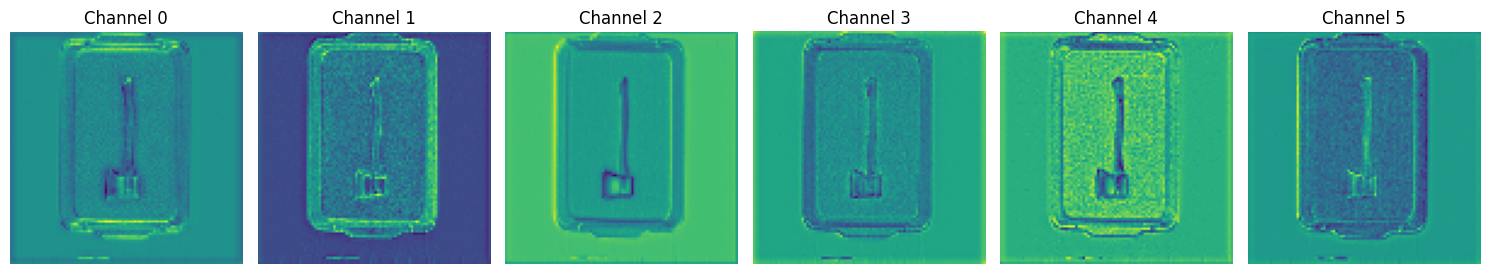

In [35]:
# Stage 0 시각화
print("Stage 0 Output Shape:", stage0_out.shape)  # 출력 모양 확인
visualize_features(stage0_out, num_channels=6)  # 상위 6개 채널 시각화

Stage 1 Output Shape: torch.Size([1, 768, 48, 48])


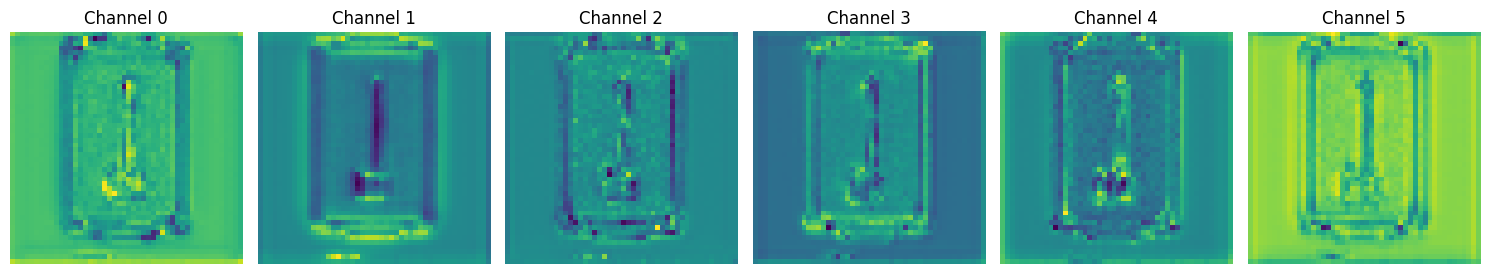

In [36]:
# Stage 1 시각화
print("Stage 1 Output Shape:", stage1_out.shape)  # 출력 모양 확인
visualize_features(stage1_out, num_channels=6)  # 상위 6개 채널 시각화


Stage 2 Output Shape: torch.Size([1, 1536, 24, 24])


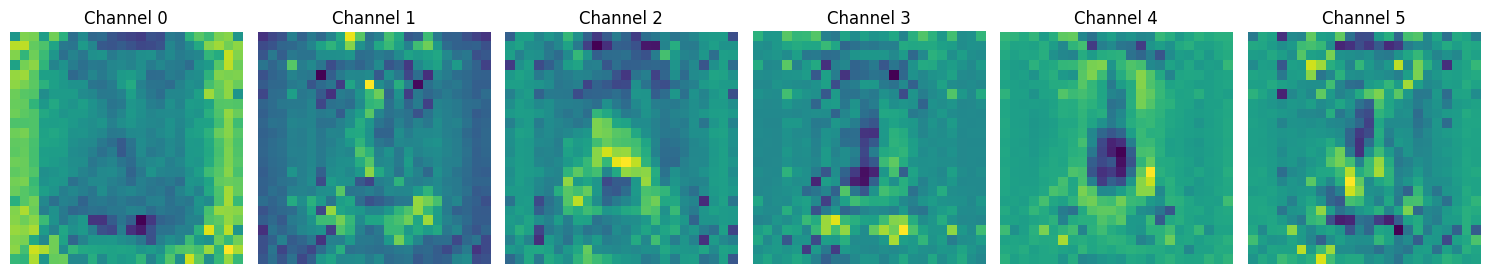

In [37]:

# Stage 2 시각화
print("Stage 2 Output Shape:", stage2_out.shape)  # 출력 모양 확인
visualize_features(stage2_out, num_channels=6)  # 상위 6개 채널 시각화


Stage 3 Output Shape: torch.Size([1, 3072, 12, 12])


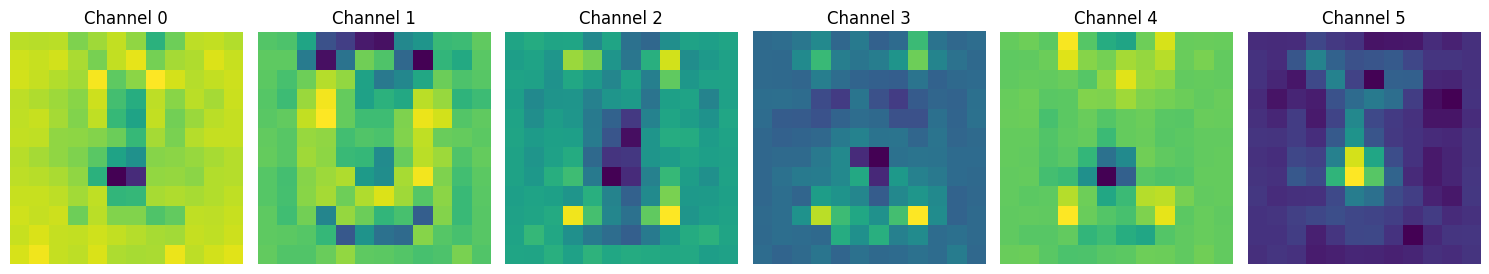

In [38]:
# Stage 3 시각화
print("Stage 3 Output Shape:", stage3_out.shape)  # 출력 모양 확인
visualize_features(stage3_out, num_channels=6)  # 상위 6개 채널 시각화
